In [11]:
import networkx as nx
import random
import math
import numpy as np
random.seed(57)


## Spectral Graph Theory

## Eigenvectors and Eigenvalues
- A vector $v$ is an eigenvector of Matrix $M$ of eigenvalues $\lambda$ if $Mv = \lambda v$
- if M is a symmetrical matrix, then each of its distinct eigenvectors are orthogonal, meaning $v_1.v_2=0$ if $\lambda_1 \neq \lambda_2$

# Eigendecompositoin
if we let $V$ be the matrix whose ith column is $v_1$ and $\Lambda$ be the diagonal matrix whose ith diagonal is $\lambda_i$, an eigendecomposition of $M$ is $$M = V \Lambda V^T =\sum_{i} \lambda_i v_i v_{i}^{T}$$

# Weighted Graph
Edges can have weights to signify importance of a connection.
- We can use graph as a universal representation of data that:
 - includes structure that can be captured through mechanisms such as adjacency matrices, 
 - includes data as node features, 
 - has similarity between adjacent nodes presented as $w_{ij}$.
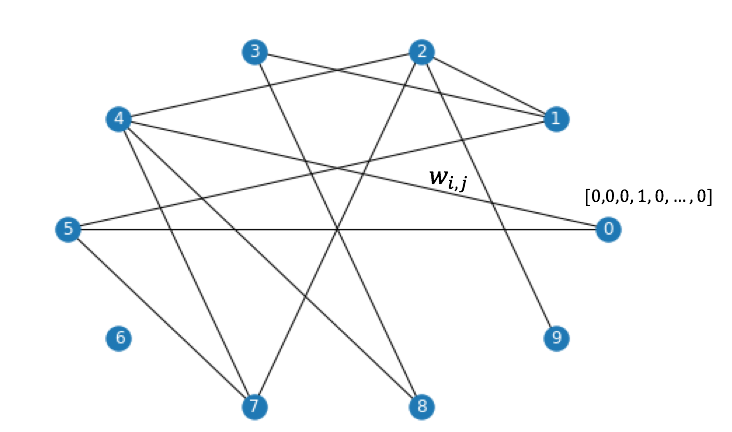

In [61]:
import networkx as nx
import random
import numpy as np
import math
import matplotlib.pyplot as plt
random.seed(42)
N = 10
DROP_RATE=.75
G = nx.complete_graph(N)
for (u,v,w) in G.edges(data=True):
    w['weight'] = random.random()    
G.remove_edges_from(random.sample(G.edges(),k=int(DROP_RATE*G.number_of_edges())))
pos=nx.spring_layout(G)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= 0.7]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.3]
emiddle = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.3 and d['weight'] < 0.7]

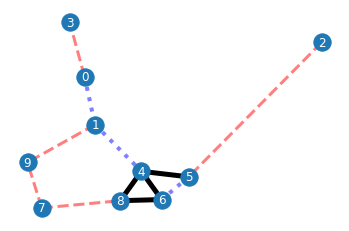

In [62]:
nx.draw_networkx_nodes(G, pos, )
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,width=3, alpha=0.5, edge_color='r', style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=emiddle, width=4, alpha=0.5, edge_color='b', style='dotted')
nx.draw_networkx_labels(G, pos, font_color='w', font_family='sans-serif')
plt.axis('off')
plt.show()

# Adjacency Matrix for a Weighted Graph
Weighted graph $\mathcal{G}=(V,E,w)$ is an undirected graph $\mathcal{G}=(V,E)$ along with a function $w:E\rightarrow \mathbb{R}^+$. The adjacency matrix of a $\mathcal{G}$ is given by:
$$
A_{\mathcal{G}}(i,j) = 
\begin{cases}
  w(i,j)  & \text{if (i,j)} \in E,\\    
  0 & otherwise    
\end{cases}
$$

[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


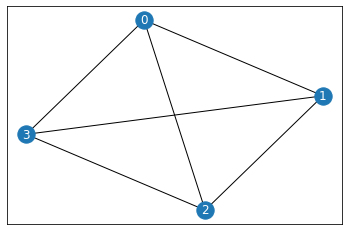

In [56]:
H = nx.complete_graph(4)
nx.draw_networkx(H, with_labels=True, font_color='w')
print(nx.adjacency_matrix(H).todense())

[[0 1 1 1]
 [1 0 0 1]
 [1 0 0 0]
 [1 1 0 0]]


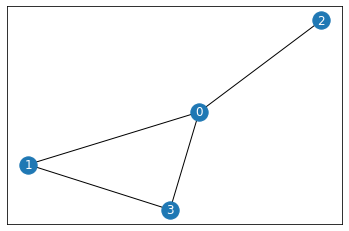

In [66]:
H = nx.complete_graph(4)
H.remove_edges_from(random.sample(H.edges(),k=int(.40*H.number_of_edges())))
nx.draw_networkx(H, with_labels=True, font_color='w')
print(nx.adjacency_matrix(H).todense())

# Degree Matrix 
- Degree matrix of a weighted graph $\mathcal{G}$ is a diagonal matrix such that:
$$D_\mathcal{G}(i,i)=\sum_{j}A_\mathcal{G}(i,j)$$
- Intuitively, degree matrix expresses how many connections a node has

In [20]:
nx.degree(H)

DegreeView({0: 2, 1: 3, 2: 1, 3: 2})

# The Laplacian Matrix
- The Laplacian matrix of a weighted graph $\mathcal{G}$ is denoted $L_\mathcal{G}$ and is defined as $$L_\mathcal{G} = D_\mathcal{G} - A_\mathcal{G} $$
- **Definition**: 

Let $\mathcal{G}_{1,2}$be the graph on two vertices and with one edge of weight 1.
$$
L_{\mathcal{G}_{1,2}}\overset{def}{=}
\begin{bmatrix} 1 & -1 \\ 
                -1 & 1 
\end{bmatrix}
$$
For a weighted graph $\mathcal{G}=(V,E,w)$, 

$$L_{\mathcal{G}}\overset{def}{=}\sum_{u,v}w(u,v)L_{\mathcal{G_{u,v}}}$$

where $\mathcal{G_{u,v}}$ is a graph with $n$ vertices and and just one edge between u and v. Laplacian matrix of $\mathcal{G_{u,v}}$ is the $n\times n$ matrix whose only non-zero entries are in the intersections of rows and columns $u$ and $v$.
Now we can see for $\forall x\in \mathbb{R}^V$, $$x^T L_{\mathcal{G}} x = \sum_{(u,v) \in E}w(u,v)(x(u)-x(v))^2$$


In [30]:
nx.linalg.laplacian_matrix(H).todense()

matrix([[ 2, -1,  0, -1],
        [-1,  3, -1, -1],
        [ 0, -1,  1,  0],
        [-1, -1,  0,  2]], dtype=int64)

# Connectivity
- Graph $\mathcal{G}$ has $k$ connected components if and only of $\lambda_0=\lambda_1=...\lambda_{k-1}=0$
- Graph Laplacian Spectrum (or graph eigen values) present information about connectivity of a graph and vise versa.

# Neighborhood
- If a vertex $v$ is an endpoint of edge $e$, we say they are incident. The set of vertices adjacent to $v$ is called the neighborhood of $v$, denoted $\mathcal{N}(v)$.

In [55]:
for j in range(4):
    print(j, [n for n in H.neighbors(j)])  

0 [1, 3]
1 [0, 2, 3]
2 [1]
3 [0, 1]


# Bipartite Graph
- A graph G is bipartite if its vertices can be partitioned into twoparts, say $\{v_1, v_2, . . . , v_n\}$ and $\{w_1, w_2, . . . , w_n\}$ so that all edges join some $v_i$ to some $w_j$ ; no two vertices $v_i$ and $v_j$ are adjacent, nor are any vertices $w_i$ and $w_j$.
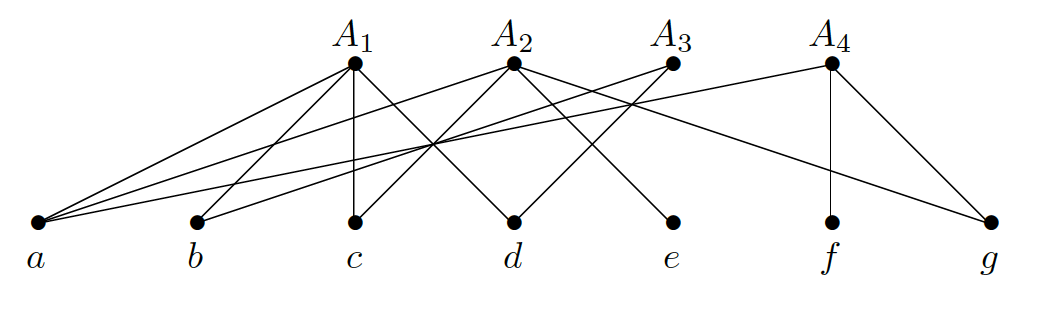